In [1]:
# Implementation to find the best alpha for lasso using cv

0.0001 [ 4.38725041e-01  9.60573216e-03 -1.02607317e-01  6.13113796e-01
 -7.60040055e-06 -4.48887838e-03 -4.17236219e-01 -4.30443252e-01]
0.00021544346900318845 [ 4.38302495e-01  9.61391144e-03 -1.01794733e-01  6.08938831e-01
 -7.56305472e-06 -4.48945068e-03 -4.17101115e-01 -4.30245638e-01]
0.00046415888336127773 [ 4.37392131e-01  9.63153273e-03 -1.00044046e-01  5.99944032e-01
 -7.48259718e-06 -4.49068359e-03 -4.16810078e-01 -4.29819929e-01]
0.001 [ 4.35430588e-01  9.66949146e-03 -9.62719961e-02  5.80564052e-01
 -7.30927570e-06 -4.49333892e-03 -4.16183481e-01 -4.28903173e-01]
0.002154434690031882 [ 4.31204047e-01  9.75125876e-03 -8.81446225e-02  5.38808130e-01
 -6.93591112e-06 -4.49905750e-03 -4.14834520e-01 -4.26929052e-01]
0.004641588833612777 [ 4.22097249e-01  9.92739780e-03 -7.06333349e-02  4.48842020e-01
 -6.13160704e-06 -4.51137374e-03 -4.11930165e-01 -4.22677769e-01]
0.01 [ 4.02474124e-01  1.03068044e-02 -3.29020231e-02  2.54997948e-01
 -4.39905667e-06 -4.53789547e-03 -4.0567889

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CV [ 3.81485543e-01  1.12872676e-02  2.20440782e-03  0.00000000e+00
  1.88778147e-06 -3.51349405e-03 -3.39002345e-01 -3.39456784e-01]


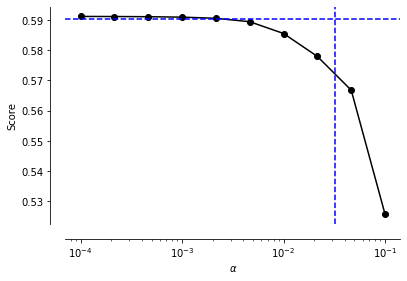

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model

dataset = sklearn.datasets.fetch_california_housing()
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

alphas = np.logspace(-4, -1, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)
    
lassocv = linear_model.LassoCV()
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')import seaborn as sns
plt.xscale('log')
sns.despine(offset=15)